# Thermophysical properties of CO$_2$ #

Thermophysical properties of CO$_2$ used in MOOSE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Phase diagram ##

<img src=co2_phase_diagram.svg width=300>

* The **triple point** is $P_t = 517$ kPa, $T_t = -56.6$ C (216.55 K)
* The **critical point** is  $P_c = 7.3773$ MPa, $T_c = 30.9782$ C (304.13 K)

For simulations of geological storage of CO$_2$, the most important regions are the gas phase and supercritical phase as these occur at typical temperatures and pressures encountered in practice. As a result, no thermophysical properties for the liquid and solid phases are implemented, and hence the results shown in this notebook are only for the gas and supercritical phases.

## Density ##

Density of CO$_2$ as a function of pressure and temperature.

Gas density correlation from Pruess (TOUGH2).

Supercritical density from Ouyang, *New correlations for predicting the density and viscosity of supercritical Carbon Dioxide under conditions expected in Carbon Capture and Sequestration operations*, The Open Petroleum Engineering Journal, 4, 13-21 (2011)

MOOSE data taken from test suite problems. Benchmark data from NIST chemistry webbook (http://webbook.nist.gov/chemistry/fluid/).

In [218]:
moosedata1 = pd.read_csv('gold/CO2Property_density1_vpp_0001.csv')
moosedata2 = pd.read_csv('gold/CO2Property_density2_vpp_0001.csv')

nist_data1 = pd.read_csv('gold/co2_nist_t100.csv', header=None, delimiter ='\t')
nist_data2 = pd.read_csv('gold/co2_nist_t50.csv', header=None, delimiter ='\t')

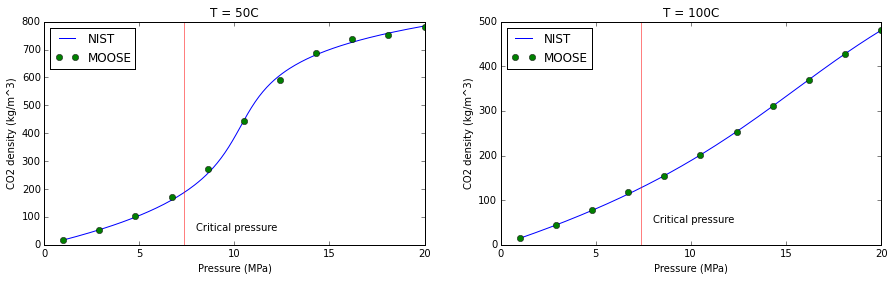

In [219]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# T = 50C
axes[0].plot(nist_data2.icol(1), nist_data2.icol(2), label='NIST')
axes[0].plot((1+9.5*moosedata2.x), moosedata2.CO2PropertyAuxVariable, 'o',label='MOOSE')
axes[0].set_xlabel('Pressure (MPa)')
axes[0].set_ylabel('CO2 density (kg/m^3)')
axes[0].set_title('T = 50C')
axes[0].legend(loc = 'upper left')
axes[0].axvline(7.3773, linewidth=0.5, color='r')
axes[0].annotate('Critical pressure', xy=(8,50), xytext=(8,50))
# T = 100C
axes[1].plot(nist_data1.icol(1), nist_data1.icol(2), label='NIST')
axes[1].plot((1+9.5*moosedata1.x), moosedata1.CO2PropertyAuxVariable, 'o',label='MOOSE')
axes[1].set_xlabel('Pressure (MPa)')
axes[1].set_ylabel('CO2 density (kg/m^3)')
axes[1].set_title('T = 100C')
axes[1].legend(loc = 'upper left')
axes[1].axvline(7.3773, linewidth=0.5, color='r')
axes[1].annotate('Critical pressure', xy=(8,50), xytext=(8,50))

Derivatives of density with respect to pressure and temperature are required in the Jacobian terms coded in MOOSE.

We verify that they are correctly coded by reconstructing a density profile using the NIST density.

#### Derivative with respect to pressure ####
Use the NIST density at 1MPa, and multiplying the pressure step with the computed gradient. If the gradient values are correct, the NIST density profile should be recovered.

In [226]:
moosedata = pd.read_csv('gold/CO2Property_dDensity_dP1_vpp_0001.csv')

rho0 = 14.525
mdensity = np.zeros(len(moosedata))
mdensity[0] = rho0;
psteps = np.ediff1d((1+9.5*moosedata.x)*1e6)

for i in range(1,len(moosedata)) :
    mdensity[i] = mdensity[i-1] + moosedata.CO2PropertyAuxVariable[i-1] * psteps[i-1]

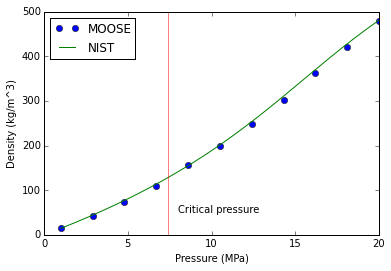

In [227]:
plt.plot((1+9.5*moosedata.x), mdensity,'o', label='MOOSE')
plt.plot(nist_data1.icol(1), nist_data1.icol(2), label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')
plt.axvline(7.3773, linewidth=0.5, color='r')
plt.annotate('Critical pressure', xy=(8,10), xytext=(8,50))

#### Derivative with respect to temperature ####
Use the NIST density at 5MPa and 50C (gas phase), and also 10 MPa and 50C (supercritical phase) and multiplying the temperature step with the computed gradient. If the gradient values are correct, the NIST density profile should be recovered. 

In [308]:
moosedata1 = pd.read_csv('gold/CO2Property_dDensity_dT1_vpp_0001.csv')
nist_data1 = pd.read_csv('gold/co2_nist_p5mpa.csv', header=None, delimiter ='\t')

moosedata2 = pd.read_csv('gold/CO2Property_dDensity_dT2_vpp_0001.csv')
nist_data2 = pd.read_csv('gold/co2_nist_p10mpa.csv', header=None, delimiter ='\t')

rho01 = 104.85
rho02 = 384.33
mdensity1 = np.zeros(len(moosedata1))
mdensity1[0] = rho01;
mdensity2 = np.zeros(len(moosedata2))
mdensity2[0] = rho02;
tsteps = np.ediff1d((50+25*moosedata1.x))

for i in range(1,len(moosedata1)) :
    mdensity1[i] = mdensity1[i-1] + moosedata1.CO2PropertyAuxVariable[i-1] * (tsteps[i-1])
    mdensity2[i] = mdensity2[i-1] + moosedata2.CO2PropertyAuxVariable[i-1] * (tsteps[i-1])

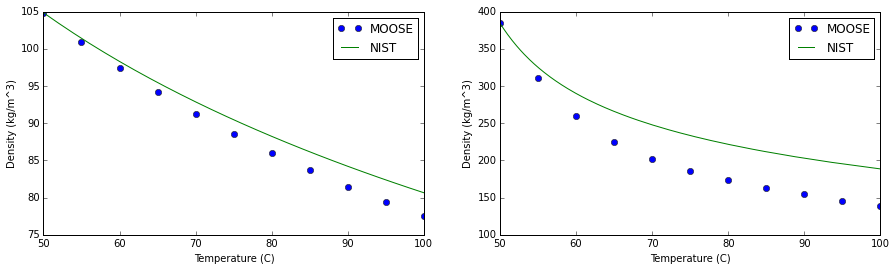

In [309]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# P = 5 MPa (gas phase)
axes[0].plot((50+25*moosedata1.x), mdensity1,'o', label='MOOSE')
axes[0].plot(nist_data1.icol(0), nist_data1.icol(2), label='NIST')
axes[0].legend(loc='upper right')
axes[0].set_xlabel('Temperature (C)')
axes[0].set_ylabel('Density (kg/m^3)')

# P = 10 MPa (supercritical phase)
axes[1].plot((50+25*moosedata1.x), mdensity2,'o', label='MOOSE')
axes[1].plot(nist_data2.icol(0), nist_data2.icol(2), label='NIST')
axes[1].legend(loc='upper right')
axes[1].set_xlabel('Temperature (C)')
axes[1].set_ylabel('Density (kg/m^3)')

## Viscosity ##

Viscosity of CO2 as a function of pressure and temperature.

Gas density Fenghour et al., *The viscosity of carbon dioxide*, J. Phys. Chem. Ref. Data, 27, 31-44 (1998).

Supercritical density from Ouyang, New correlations for predicting the density and viscosity of supercritical Carbon Dioxide under conditions expected in Carbon Capture and Sequestration operations, The Open Petroleum Engineering Journal, 4, 13-21 (2011)

MOOSE data taken from test suite problems. Benchmark data from NIST chemistry webbook (http://webbook.nist.gov/chemistry/fluid/).

In [4]:
moosedata1 = pd.read_csv('gold/CO2Property_viscosity1_vpp_0001.csv')
moosedata2 = pd.read_csv('gold/CO2Property_viscosity2_vpp_0001.csv')

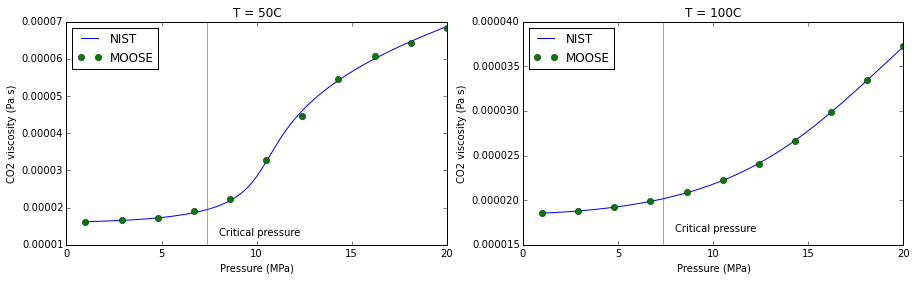

In [5]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# T = 50C
axes[0].plot(nist_data2.icol(1), nist_data2.icol(11)/1e6, label='NIST')
axes[0].plot((1+9.5*moosedata2.x), moosedata2.CO2PropertyAuxVariable, 'o',label='MOOSE')
axes[0].set_xlabel('Pressure (MPa)')
axes[0].set_ylabel('CO2 viscosity (Pa s)')
axes[0].set_title('T = 50C')
axes[0].legend(loc = 'upper left')
axes[0].axvline(7.3773, linewidth=0.5, color='r')
axes[0].annotate('Critical pressure', xy=(8,0.000015), xytext=(8,0.0000125))

# T = 100C
axes[1].plot(nist_data1.icol(1), nist_data1.icol(11)/1e6, label='NIST')
axes[1].plot((1+9.5*moosedata1.x), moosedata1.CO2PropertyAuxVariable, 'o',label='MOOSE')
axes[1].set_xlabel('Pressure (MPa)')
axes[1].set_ylabel('CO2 viscosity (Pa s)')
axes[1].set_title('T = 100C')
axes[1].legend(loc = 'upper left')
axes[1].axvline(7.3773, linewidth=0.5, color='r')
axes[1].annotate('Critical pressure', xy=(8,0.000015), xytext=(8,0.0000165))

## Partial density ##

Partial density of aqueous CO$_2$ as a function of temperature.

From Garcia, *Density of aqueous solutions of CO$_2$*, LBNL-49023 (2001).

Experimental data from Hnedkovsky et al, *Volumes of aqueous solutions of CH4, CO2, H2S, and NH3 at temperatures from 298.15 K to 705 K and pressures to 35 MPa*, J. Chem. Thermodynamics 28, 125–142 (1996). Note that data is for partial molar volume (cm^3/mol), and must be converted to kg/m^3 using 44.e-3 * 1e6 / $V$, where 44.e-3 is the molar weight of CO$_2$, and $V$ is the partial molar volume given. Two data sets are provided for P = 20 MPa, and P = 35 MPa, and temperature is in K. Note also that the fit of Garcia (2001) is made to additional data. This isn't plotted here for brevity.

MOOSE data taken from test suite problems. It is seen to satisfactorily fit the data (as well as given in Garcia, 2001).

In [325]:
moosedata = pd.read_csv('gold/CO2Property_partialDensity_vpp_0001.csv')

expdata_p20 = np.array([[298.15,33.4], [323.15, 33.8], [373.15, 37.8], [423.15, 42.7], [473.15, 50], [523.15, 61.8], [573.15, 84.6], [623.15, 133.6]])
expdata_p35 = np.array([[298.15,33.5], [323.15, 33.7], [373.15, 37.2], [423.15, 41.9], [473.15, 48.4], [523.15, 57.7], [573.15, 74.1], [623.15, 112.8]])


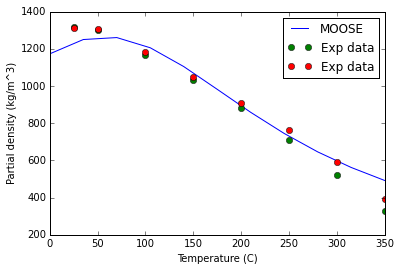

In [328]:
scale = 44.e3

plt.plot((175*moosedata.x), moosedata.CO2PropertyAuxVariable, label='MOOSE')
plt.plot((expdata_p28[:,0]- 273.15), scale / expdata_p20[:,1], 'o', label='Exp data')
plt.plot((expdata_p35[:,0]- 273.15), scale / expdata_p35[:,1], 'o', label='Exp data')
plt.legend(loc='upper right')
plt.xlabel('Temperature (C)')
plt.ylabel('Partial density (kg/m^3)')